<p style="font-family: Cambria; text-align: center; font-size: 48px;">  I. DATA PRE-PROCESSING</p>

In [56]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [40]:
#Reading the file 
dfGDData=pd.read_excel("Gestational Diabetes Data.xlsx",sheet_name = "Data")

<p style="font-family: Cambria; font-size: 16px;"><b>
  1.Removed all columns that could be derived from other columns through a simple calculation. For eg: <br>
  GCT 1h value &gt;7.5mM,<br>
  GCT 1h value &gt;7.5mM 10,<br>
  GCT 1h value &gt;7.8mM 10<br>
  Are all derived from the column 1h glucose. Therefore, only 1h glucose is needed in our final table. This reduces our final set of variables to a shorter, more readable list with no loss of information. The full list of removal under this category is given in the code below.
</p>

In [42]:
dfGDData.drop(columns=['GCT10 2', 'Height (m) V1','BMI V1','Smoking','Smoking 10 V1','White 10 V1','Previous GDM V1','Meds 10 V1','Age >30 10','BMI (kg/m2) V1 2','BMI>30','Obese 10','Overweight 10','Overweight 123','Hx GDM, glycosuria, 1st degree rel','GCT 10','25OHD checked','25OHD 10'],axis=1,inplace=True)
dfGDData.drop(columns=['Ref to psych','V1 HbA1c (mmol/mol)','V1 HBa1C <48 mmol/mol','V1 Hb','V1 Creatinine', 'V1 ALT','V1 CRP','V1 PCR','GCT10 screening visit','GCT','GCT 1h value >7.5mM','GCT 1h value >7.2mM 10', 'GCT 1h value >7.5mM 10', 'GCT 1h value >7.8mM 10','GCT Ref to DNS?','GCT Ref to DNS 10','OGTT performed','OGTT 10 V3'],inplace=True)
dfGDData.drop(columns=['OGTT 0h value high 10','OGTT 1h value high 10','OGTT 1h value high 10.1','OGTT values high','OGTT high 10','GCT 1h value >7.5mM 10.1','GCT OGTT high 10','OGTT Ref to DNS 10','GCT Ref to DNS 10.1','Ref to DNS 10','Miscarriage before 28/40 2','Withdrew before 28/40 2'],axis=1,inplace=True)
dfGDData.drop(columns=['V3 GA','Miscarried <28/40','Miscarried >28/40','V3 HbA1c','V3 Hb','V3 Creat','V3 CRP', 'V3 U PCR','V3 AC <35 cm','AC >350mm 10','m Weight (kg) V1','m Weight (kg) V3','Weight change','Weight change (%)','systolic BP (mmHg) V1.1','systolic BP (mmHg) V3.1','sBP change','BP change (%)'],inplace=True)
dfGDData.drop(columns=['HbA1c change','HbA1c change >3 mmol/mol 10','HbA1c Change (%)','HbA1c rise >10%','HbA1c rise >5%','Hb change','Hb change (%)','Creat change','Creat change (%)','V3 ALT.1','ALT change','ALT change (%)','CRP change','CRP change (%)','PCR change','PCR change (%)'],axis=1,inplace=True)
dfGDData.drop(columns=['Date of Data Collection.1','Miscarriage','Lost to f/u', 'Nutrition 10','Glucose lowering therapies','Gestational hypertension','Pre-eclampsia','Eclampsia','HELLP','HELLP 10','Induction','Instrumentation 10','Date of Delivery','Miscarriage before 28/40 v2','Miscarriage.1','Miscarriage after 28/40'],inplace=True)
dfGDData.drop(columns=['Still-birth 10','Birth Injury','Birth weight >4kg', 'BW >4kg 10', 'BW >4.5kg 10', 'BW <2.5kg 10','Brachial plexus injury','Plexus injury 10','Other nerve injury','Clavicular fracture','Humeral fracture','Skull fracture','Other birth injury'],axis=1,inplace=True)
dfGDData.drop(columns=['Perinatal death', 'Perinatal death 10', 'Fetal hypoglycaemia', 'Fetal hypoglycaemia 10', 'Fetal jaundice', 'Fetal phototherapy','Surfactant use','RR>60 10', 'SCBU','Cong malformation','Spina bifida','Cleft palate','Cleft Lip','Hydrocephalus','Cardiac murmur', 'Cardiac anomaly', 'Tetralogy of Fallot','Transposition of Great arteries', 'Septal defect', 'Other cardiac anomaly'],inplace=True)
dfGDData.drop(columns=['Caesarean','Screened 10 2'], inplace=True)
dfGDData.drop(columns=['Cause of fetal death','V1 U creatinine','V3 U Creat','Date 25OHD result received','Date Form Signed','Date Prescription sent?','Shoulder dystocia'], inplace=True)
dfGDData.drop(columns=['Screened 10 3','GDM screening performed? V2','Screening DNA','Screened 10','Date Screening','Screening DNA 2','DNA Visit 3 10','Miscarriage before 28/40','Withdrew before 28/40'], inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b> 2. Removed all columns showing treatments provided to the fetus after birth that no longer fall under the mothers medical history. <br>For eg: Fetal phototherapy 10  is a column indicating if phototherapy was provided for babies with jaundice. We chose to preserve the field indicating fetal jaundice, but any further treatment of the baby would not reflect on the health of the mother.
All columns that fall into this category are removed in the code given below:


In [44]:
dfGDData.drop(columns=[ 'Fetal phototherapy 10','Insulin/Metformin','List used','Vit D List used','GDM screening performed?'], inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>3.Removed all columns that which did not relate directly or indirectly to the presence of high blood sugar or GDM. For eg: Number obstetric clinics might be useful in a larger dataset that shows that patients were more likely to get diagnosed and treated early, if there are clinics nearby. However, in our dataset, no such meaningful correlations seemed to exist

In [46]:
dfGDData.drop(columns=['Miscarried 10'], inplace=True)
dfGDData.drop(columns=['Number obstetric clinics'], inplace=True)
dfGDData.drop(columns=['OGTT Ref to DNS'], inplace=True)
dfGDData.drop(columns=['PMHx V1'], inplace=True)
dfGDData.drop(columns=['Ref to Psych'], inplace=True)
dfGDData.drop(columns=['25OHD checked yes (1) or no (0)'], inplace=True)
dfGDData.drop(columns=['Date of Data Collection'], inplace=True)
dfGDData.drop(columns=['V3 Albumin'], inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>4.Removed Alcohol intake V1 because of insufficient data with only one patient reported we can remove this column.


In [48]:
#Dropping unnecessary columns
dfGDData.drop(['Alcohol Intake V1','Number GDM clinics'], axis=1,inplace=True)

num_columns = dfGDData.shape[1]
print(f"Number of columns: {num_columns}")

<p style="font-family: Cambria; font-size: 16px;"><b>5.Renamed  these columns as the original column names are verbose and inconsistent, so  standardizing them to cleaner, shorter, more technical identifiers. 
    'EDD in keeping with LMP?': 'EDDEqLMP',
    'EDD estimation method': 'EDDMethod',
    'LSCS 10': 'Caesarean',
    'Ethnicity V1': 'Ethnicity',
    'Fetal jaundice 10': 'FetalJaundice',
    '1h glucose': 'Glucose_1h',
    'GHP 10': 'GestationalHP',
    'Glucose lowering therapy 10': 'GlucoseTherapy',
    'V1 HbA1c (mmol/mol).1': 'HB1AC_V1',
    'V3 HbA1c.1': 'HB1AC_V3',
    'V1 Hb.1': 'Hemoglobin_V1',
    'V3 Hb.1': 'Hemoglobin_V3',
    'HbA1c V2': 'HB1AC_V2',
    'Height (cm) V1': 'Height_cms',
    'Induction 10': 'Labor_Induced',
    'Instrumentation': 'Instrument_Delivery',
    'Insulin 10': 'On_Insulin',
    'Metformin 10': 'On_Metformin',
    'Medications V1': 'Medications_All'

In [50]:

dfGDData.rename(columns={'EDD in keeping with LMP?': 'EDDEqLMP', 'EDD estimation method': 'EDDMethod','LSCS 10':'Caesarean','Ethnicity V1':'Ethnicity','Fetal jaundice 10':'FetalJaundice','1h glucose':'Glucose_1h'}, inplace=True)
dfGDData.rename(columns={'GHP 10': 'GestationalHP', 'Glucose lowering therapy 10': 'GlucoseTherapy','V1 HbA1c (mmol/mol).1':'HB1AC_V1','V3 HbA1c.1':'HB1AC_V3','V1 Hb.1':'Hemoglobin_V1','V3 Hb.1':'Hemoglobin_V3','HbA1c V2':'HB1AC_V2'}, inplace=True)
dfGDData.rename(columns={ 'Height (cm) V1': 'Height_cms', 'Induction 10': 'Labor_Induced','Instrumentation':'Instrument_Delivery', 'Insulin 10':'On_Insulin','Metformin 10':'On_Metformin','Medications V1':'Medications_All'}, inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>6.Renamed these columns for better readability
    'Chronic Illness V1': 'Chronic Illness',
    'Cong malformation 10': 'Cong malformation',
    'V1 Creatinine': 'Creatinine_V1',
    'V3 Creat': 'Creatinine_V3',
    'V1 CRP': 'CRP_V1',
    'V3 CRP': 'CRP_V3'

In [52]:
#Renaming columns for better readability
dfGDData.rename(columns={'Chronic Illness V1': 'Chronic Illness','Cong malformation 10':'Cong malformation','V1 Creatinine':'Creatinine_V1','V3 Creat':'Creatinine_V3','V1 CRP':'CRP_V1','V3 CRP':'CRP_V3'}, inplace=True)
dfGDData.rename(columns={'Prescription for Caltrate sent?':'Caltrate','Delivered before 36/40 10':'Delivered before 36/40','Diagnosed with Vit D Deficiency':'Vit D Deficiency','Dystocia 10':'Dystocia'}, inplace=True)
dfGDData.rename(columns={'Eclampsia 10':'Eclampsia','Pre-eclampsia 10':'Pre eclampsia'}, inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>7.If a column indicated the presence or absence of a test/procedure that was administered and contained null values. Then the null values were changed to ‘No’ to indicate that the test/procedure was not administered. For eg: All null values in the column Prescription for Caltrate sent? Were set to ‘No’ to indicate it was not sent



In [58]:
dfGDData['Emergency'] = dfGDData['Emergency'].fillna('No')
dfGDData['Epidural'] = dfGDData['Epidural'].fillna('No')
dfGDData['GlucoseTherapy'] = dfGDData['GlucoseTherapy'].fillna(0)

In [60]:
dfGDData['Cong malformation'] = dfGDData['Cong malformation'].fillna(0)
dfGDData['Caltrate'] = dfGDData['Caltrate'].fillna('No')

<p style="font-family: Cambria; font-size: 16px;"><b>8.If a column (like ‘Caesarean’) contained a medical diagnoses  stored as  ‘Yes/No’, null values would be replaced with “NR” to  indicate that a medical diagnosis was “Not Recorded”

In [62]:
dfGDData['EDDEqLMP'] = dfGDData['EDDEqLMP'].fillna('NR')
dfGDData['EDDMethod'] = dfGDData['EDDMethod'].fillna('NR')
dfGDData['FetalJaundice'] = dfGDData['FetalJaundice'].fillna('NR')
dfGDData['GestationalHP'] = dfGDData['GestationalHP'].fillna('NR')
dfGDData['Labor_Induced'] = dfGDData['Labor_Induced'].fillna('NR')
dfGDData['Instrument_Delivery'] = dfGDData['Instrument_Delivery'].fillna('NR')
dfGDData['On_Insulin'] = dfGDData['On_Insulin'].fillna('NR')
dfGDData['On_Metformin'] = dfGDData['On_Metformin'].fillna('NR')
dfGDData['Spinal'] = dfGDData['Spinal'].fillna('NR')
dfGDData['Caesarean'] = dfGDData['Caesarean'].fillna('NR')

In [64]:
dfGDData['Vit D Deficiency'] = dfGDData['Vit D Deficiency'].fillna('NR')
dfGDData['Eclampsia'] = dfGDData['Eclampsia'].fillna('NR')
dfGDData['Pre eclampsia'] = dfGDData['Pre eclampsia'].fillna('NR')

In [66]:
dfGDData.columns


Index(['Participant ID', 'systolic BP (mmHg) V1', 'diastolic BP (mmHg) V1',
       'Pulse (bpm) V1', 'Weight (kg) V1', 'Height_cms', 'BMI (kg/m2) V1',
       'Smoking 123', 'Ethnicity', 'PreviousGDM10 V1', 'Chronic Illness',
       'Medications_All', 'Age>30', 'HighRisk 10', 'Screening method',
       '1st DASS score >33', 'V1 Gestational Age', 'EDD V1', 'WCC',
       'V1 Platelet', 'V1 Calcium', 'V1 Albumin', 'V1 U albumin',
       'V1 U protein', 'V1 US EDD', 'EDDEqLMP', 'EDDMethod',
       'V1 25OHD value (nmol/L)', 'Caltrate', 'Glucose_1h', 'OGTT 0h value',
       'OGTT 1h value', 'OGTT 2h value', 'Miscarriage after 28/40 10',
       'Withdrew after 28/40 10', 'Delivered before 36/40',
       'Attended Visit 3 10', 'Date of Visit 3', 'HB1AC_V2', 'Weight (kg) V3',
       'systolic BP (mmHg) V3', 'diastolic BP (mmHg) V3', 'Pulse (bpm) V3',
       '3rd visit DASS >33', 'V3 WCC', 'V3 Platelet', 'V3 Calcium', 'V3 ALT',
       'V3 U Alb', 'V3 U Prot', 'V3 25OHD value', 'V3 Abdominal Circ

<p style="font-family: Cambria; font-size: 16px;"><b>9.The Ethnicity column contained 34 values instead of the 6 given as codes in the first sheet. This column was standardized by removing all values in brackets so that they matched the codes given

In [68]:
dfGDData['Ethnicity']=dfGDData.Ethnicity.str.replace(r" \(.*\)","", regex=True)
dfGDData['Ethnicity'] = dfGDData.Ethnicity.str.title()

In [70]:
dfGDData['Epidural'] = dfGDData['Epidural'].str.title()

<p style="font-family: Cambria; font-size: 16px;"><b>10.If a column indicated the presence or absence of a test/procedure that was administered and contained null values. Then the null values were changed to ‘No’ to indicate that the test/procedure was not administered. For eg: All null values in the column Prescription for Caltrate sent? Were set to ‘No’ to indicate it was not sent.

In [72]:
# Avoid noice in the data

dfGDData['Caltrate'].replace('No (Miscarried)','No')

# Avoid noice in the data - Prescription for Caltrate sent?

dfGDData['Vit D Deficiency']=dfGDData['Vit D Deficiency'].str.startswith(('Yes','yes')).replace([True,False],['Yes','No'])


<p style="font-family: Cambria; font-size: 16px;"><b>11.All columns that contained values already documented in a dedicated separate column were cleaned so that only the data needed in that column would remain. For eg: Date of Visit 3 contained values like: Transferred,Miscarried,DNA, etc. 
After confirming that columns like Miscarried/Withdrew after 28/40 10, DNA Visit 3 10  already contained this data, we changed all string values to null and preserved this column as a date column.

In [74]:
# Avoid noise in the data - Date of Visit 3
# Keeping only date values and removing all string value

def valid_date(date):
    try:
        pd.to_datetime(date)
        return date
    except ValueError:
        return np.nan
    
# Replace invalid dates with `NaN`
dfGDData['Date of Visit 3'] = dfGDData['Date of Visit 3'].apply(valid_date)

<p style="font-family: Cambria; font-size: 16px;">12.Null values in these columns set to NR

In [76]:
dfGDData['Twins 10'] = dfGDData['Twins 10'].fillna('NR')
dfGDData['1st DASS score >33'] = dfGDData['1st DASS score >33'].fillna('NR')
dfGDData['Withdrew after 28/40 10'] = dfGDData['Withdrew after 28/40 10'].fillna('NR')
dfGDData['Dx with GDM'] = dfGDData['Dx with GDM'].fillna('NR')

<p style="font-family: Cambria; font-size: 16px;"><b>13.Removes noise i.e., everything except digits(0-9). [^\\d]+ is a regular expression that matches one or more non-digit characters.So '45 mg/dL', 'approx. 100', or 'U/A 23' would become:'45', '100', '23' and next step is to convert the cleaned strings into actual numeric values (integers or floats).errors='coerce' replaces anything non-convertible with NaN.
Useful if there are empty strings or entries like 'unknown' left over.

In [78]:
#Removing Noise in Data
dfGDData['V1 U albumin'] = dfGDData['V1 U albumin'].astype(str).str.replace('[^\d]+', '', regex=True)
dfGDData['V1 U albumin'] = pd.to_numeric(dfGDData['V1 U albumin'], errors='coerce')

<p style="font-family: Cambria; font-size: 16px;"><b>14.Replaced non numeric responses to NR 

In [80]:
#Removing Noise in Data
dfGDData['1st DASS score >33'] = dfGDData['1st DASS score >33'].replace(['Couldn’t read/write', 'Didn’t fill it in'], 'NR')

<p style="font-family: Cambria; font-size: 16px;"><b>15.Defining a function to convert number of weeks into days and calculated number of days 

In [82]:
#Removing Noise in Data
def to_days(x):
    try:
        if '+' in x:
            weeks, days = x.split('+')
            return int(weeks) * 7 + int(days)
        else:
            return int(x)
    except:
        return None

In [84]:
#Removing Noise in Data
dfGDData['V1 Gestational Age'] = dfGDData['V1 Gestational Age'].astype(str).apply(to_days)

<p style="font-family: Cambria; font-size: 16px;"><b>16.Conditionally checked if both numbers were in the "high" or "Low" weight category. If it was not, then the 2 weights were averaged

In [86]:
#Removing Noise in Data
def avg_twins_weight(x):
    if x == '':
        return x
    elif isinstance(x, str) and ',' in x:
        # split on comma
        nums = x.split(',')
    elif isinstance(x, str) and '/' in x:
        # split on slash
        nums = x.split('/')
    elif isinstance(x, str):
        # split on whitespace
        nums = x.split()
    else:
        return np.nan
    
    # convert to float and take the average
    nums = [float(n.replace(',', '.')) for n in nums]
    avg_weight = sum(nums) / len(nums)
    return round(avg_weight, 2)

In [88]:
#Removing Noise in Data
dfGDData['Twins weight'] = dfGDData['Twins weight'].apply(avg_twins_weight)

<p style="font-family: Cambria; font-size: 16px;"><b>17.Strings like ‘Sample lost by lab’ set to null

In [92]:
dfGDData['V1 25OHD value (nmol/L)'] = (
    dfGDData['V1 25OHD value (nmol/L)']
    .replace('Sample lost by lab', np.nan)
    .astype(float)
)

<p style="font-family: Cambria; font-size: 16px;"><b>18.Strings like 'Sample not sent', 'Incorrect sample', replaced with null

In [94]:
#Removing Noise in Data
dfGDData['V3 25OHD value'] = dfGDData['V3 25OHD value'].replace(['Sample not sent', 'Incorrect sample','No Sample reci','Sample lost','Insufficent'], np.nan)

<p style="font-family: Cambria; font-size: 16px;">19.Renamed these columns for better readability<b>
    'Twins 10': 'Twins',
    'V1 Albumin': 'Albumin_V1',
    'V1 U albumin': 'U Albumin_V1',
    'V3 U Alb': 'U Albumin_V3',
    'V1 Platelet': 'Platelet_V1',
    'V3 Platelet': 'Platelet_V3',
    'V1 Calcium': 'Calcium_V1',
    'V3 Calcium': 'Calcium_V3',
    'V1 25OHD value (nmol/L)': '25OHD value (nmol/L)_V1',
    'V3 25OHD value': '25OHD value_V3',
    'V1 U protein': 'U Protein_V1',
    'V3 Abdominal Circumference': 'Abdominal Circumference_V3',
    'Attended Visit 3 10': 'Attended Visit 3',
    'V3 U Prot': 'U Protein_V3',
    'V3 WCC': 'White Cell Count_V3',
    'WCC': 'White Cell Count',
    'Dx with GDM': 'GDM Diagonised',
    'V1 Gestational Age': 'Gestational Age_V1'

In [96]:
#Renaming Columns
dfGDData.rename(columns={'Twins 10': 'Twins','V1 Albumin':'Albumin_V1','V1 U albumin':'U Albumin_V1','V3 U Alb':'U Albumin_V3','V1 Platelet':'Platelet_V1'}, inplace=True)
dfGDData.rename(columns={'V3 Platelet': 'Platelet_V3','V1 Calcium':'Calcium_V1','V3 Calcium':'Calcium_V3','V1 25OHD value (nmol/L)':'25OHD value (nmol/L)_V1','V3 25OHD value':'25OHD value_V3','V1 U protein':'U Protein_V1','V3 Abdominal Circumference':'Abdominal Circumference_V3'}, inplace=True)
dfGDData.rename(columns={'Attended Visit 3 10': 'Attended Visit 3','V3 U Prot':'U Protein_V3','V3 WCC':'White Cell Count_V3','WCC':'White Cell Count','Dx with GDM':'GDM Diagonised','V1 Gestational Age':'Gestational Age_V1'}, inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>20.In "GDM Diagnosed" column values were cleaned to "Yes" and "No". Spaces and numbers were removed. 

In [104]:
dfGDData['GDM Diagonised'] = dfGDData['GDM Diagonised'].replace('N0', 'No')

<p style="font-family: Cambria; font-size: 16px;"><b>21.Renamed columns 'V3 U PCR': 'U PCR', 'Smoking 123 ': 'Smoking','SCBU 10' : 'SCBU'

In [106]:
#rename column names

dfGDData.rename(columns={'V3 U PCR': 'U PCR', 'Smoking 123 ': 'Smoking','SCBU 10' : 'SCBU'}, inplace=True)

<p style="font-family: Cambria; font-size: 16px;"><b>22.Replaced all null values to NR

In [110]:
#replace null value with 'NR'

dfGDData['Nutritional counselling'] = dfGDData['Nutritional counselling'].fillna('No')
dfGDData['3rd visit DASS >33'] = dfGDData['3rd visit DASS >33'].fillna('NR')
dfGDData['RR>60'] = dfGDData['RR>60'].fillna('NR')
dfGDData['SCBU'] = dfGDData['SCBU'].fillna('NR')
dfGDData['Smoking 123'] = dfGDData['Smoking 123'].fillna('NR')
dfGDData['Still-birth'] = dfGDData['Still-birth'].fillna('NR')
dfGDData['Took Vit D Supplements'] = dfGDData['Took Vit D Supplements'].fillna('NR')
dfGDData['Dystocia'] = dfGDData['Dystocia'].fillna('NR')
dfGDData['Antenatal steroid use'] = dfGDData['Antenatal steroid use'].fillna('NR')

<p style="font-family: Cambria; font-size: 16px;"><b>23.Strings like 'didn’t fill in’, ‘Not done', replaced by No. Nulls replaced with ‘NR’

In [114]:
dfGDData['3rd visit DASS >33'] = dfGDData['3rd visit DASS >33'].replace({
    'IUD': 'No',
    'didn’t fill in': 'No',
    'Not done': 'No',
    'Didn’t fill in': 'No',
    'Didn’t fill in ': 'No'
})

dfGDData['Nutritional counselling'] = dfGDData['Nutritional counselling'].replace({'N0': 'No'})
dfGDData['RR>60'] = dfGDData['RR>60'].replace({'NO': 'No'})
dfGDData['Emergency'] = dfGDData['Emergency'].replace({0: 'No'})

In [116]:
dfGDData['Instrument_Delivery'] = dfGDData['Instrument_Delivery'].replace({
    'NO': 'No',
    'Yes, twin 2': 'Yes'
})

dfGDData['Still-birth'] = dfGDData['Still-birth'].replace({'NO': 'No'})
dfGDData['Spinal'] = dfGDData['Spinal'].replace({'No (GA)': 'No'})

<p style="font-family: Cambria; font-size: 16px;"><b>24.Integer value was preserved, all other strings were switched to null 

In [118]:
# replace non-numeric values with 'NR' in column_name

dfGDData['Total bilirubin'] = pd.to_numeric(dfGDData['Total bilirubin'], errors='coerce').fillna(np.nan)

<p style="font-family: Cambria; font-size: 16px;">25.Renamed these columns <b>
    'Participant ID': 'Patient_ID',
    'Weight (kg) V1': 'WeightinV1',
    'Weight (kg) V3': 'WeightinV3',
    'Pulse (bpm) V1': 'PulseinV1',
    'Pulse (bpm) V3': 'PulseinV3',
    'diastolic BP (mmHg) V1': 'diastolicBP_V1',
    'diastolic BP (mmHg) V3': 'diastolicBP_V3',
    'systolic BP (mmHg) V1': 'systolicBP_V1',
    'systolic BP (mmHg) V3': 'systolicBP_V3',
    'Antenatal steroid use': 'Antenatal_steroid_use',
    'BMI (kg/m2) V1': 'BMIinV1',
    'Birth Injury 10': 'BirthInjury',
    'Birth weight (kg)': 'BirthWeight',
    'Attended GDM clinics': 'Attended_GDM_clinics',
    'HighRisk 10': 'HighRisk',
    'V1 ALT.1': 'ALT_V1',
    'V3 ALT': 'ALT_V3',
    'Apgar 1 minute': 'Apgar_1min',
    'Apgar 3 minutes': 'Apgar_3min',
    'Age>30': 'Age_gt_30'

In [120]:
# Replacing the column names
dfGDData = dfGDData.rename(columns={'Participant ID': 'Patient_ID'})
dfGDData = dfGDData.rename(columns={'Weight (kg) V1': 'WeightinV1'})
dfGDData = dfGDData.rename(columns={'Weight (kg) V3': 'WeightinV3'})
dfGDData = dfGDData.rename(columns={'Pulse (bpm) V1': 'PulseinV1'})
dfGDData = dfGDData.rename(columns={'Pulse (bpm) V3': 'PulseinV3'})
dfGDData = dfGDData.rename(columns={'diastolic BP (mmHg) V1': 'diastolicBP_V1'})
dfGDData = dfGDData.rename(columns={'diastolic BP (mmHg) V3': 'diastolicBP_V3'})
dfGDData = dfGDData.rename(columns={'systolic BP (mmHg) V1': 'systolicBP_V1'})
dfGDData = dfGDData.rename(columns={'systolic BP (mmHg) V3': 'systolicBP_V3'})
dfGDData = dfGDData.rename(columns={'Antenatal steroid use': 'Antenatal_steroid_use'})
dfGDData = dfGDData.rename(columns={'BMI (kg/m2) V1': 'BMIinV1'})
dfGDData = dfGDData.rename(columns={'Birth Injury 10': 'BirthInjury'})
dfGDData = dfGDData.rename(columns={'Birth weight (kg)': 'BirthWeight'})
dfGDData = dfGDData.rename(columns={'Attended GDM clinics': 'Attended_GDM_clinics'})
dfGDData = dfGDData.rename(columns={'HighRisk 10': 'HighRisk'})
dfGDData = dfGDData.rename(columns={'V1 ALT.1': 'ALT_V1'})
dfGDData = dfGDData.rename(columns={'V3 ALT': 'ALT_V3'})
dfGDData = dfGDData.rename(columns={'Apgar 1 minute': 'Apgar_1min'})
dfGDData = dfGDData.rename(columns={'Apgar 3 minutes': 'Apgar_3min'})
dfGDData = dfGDData.rename(columns={'Age>30': 'Age_gt_30'})

<p style="font-family: Cambria; font-size: 16px;"><b>26.Null values set to NR, All other values title cased to maintain standard format

In [122]:
#Clearing Noise data in Antenatal_steroid_use column
dfGDData['Antenatal_steroid_use'] = dfGDData['Antenatal_steroid_use'].replace('NO','No')

<p style="font-family: Cambria; font-size: 16px;"><b>27.Noise in Apgar_1min column is removed and If 2 weights were found and both were within normal range, they were averaged

In [124]:
#Clearing Noise data in Apgar_1min column
#dfGDData.Apgar_1min.fillna(value='NR',inplace=True)

def avg_apgar(x):
    if x == '':
        return x
    elif isinstance(x, str) and ',' in x:
        # split on comma
        nums = x.split(',')
    elif isinstance(x, str) and '/' in x:
        # split on slash
        nums = x.split('/')
    elif isinstance(x, str):
        # split on whitespace
        nums = x.split()
    else:
        return np.nan
    
    # convert to float and take the average
    nums = [float(n.replace(',', '.')) for n in nums]
    avg_weight = sum(nums) / len(nums)
    return round(avg_weight, 2)

dfGDData['Apgar_1min'] = dfGDData['Apgar_1min'].apply(avg_apgar)

<p style="font-family: Cambria; font-size: 16px;"><b>28.Clearing Noise data in BirthInjury column

In [128]:
dfGDData['BirthInjury'] = dfGDData['BirthInjury'].fillna('NR')


<p style="font-family: Cambria; font-size: 16px;"><b>29.Clearing Noise data in Attended_GDM_clinics column

In [132]:
dfGDData['Attended_GDM_clinics'] = dfGDData['Attended_GDM_clinics'].fillna('No')

<p style="font-family: Cambria; font-size: 16px;"><b>30.Replaced all non string values with Yes or No to stadardize format

In [134]:
dfGDData['Attended_GDM_clinics'] = dfGDData['Attended_GDM_clinics'].replace({
    'No (rpt OGTT-NAD)': 'No',
    'Pt miscarried': 'No',
    'Pt transferred': 'No',
    'Yes (DX @ 32wks)': 'Yes',
    'Yes (DX @ 35wks)': 'No'
})

<p style="font-family: Cambria; font-size: 16px;"><b>31.Replaced all non string values with Yes or No to stadardize format

In [138]:
#Clearing Noise data in Took Vit D Supplements
dfGDData['Took Vit D Supplements'] = dfGDData['Took Vit D Supplements'].replace({
    'ref not followed up': 'No',
    'Yes (px by GP)': 'Yes',
    'Yes (for 4/52)': 'Yes',
    'No (vomit)': 'No'
})

<p style="font-family: Cambria; font-size: 16px;"><b>32.Removed  Noise data in 25OHD value_V3

In [142]:
dfGDData['25OHD value_V3'] = pd.to_numeric(
    dfGDData['25OHD value_V3'].replace({
        'Lab error': np.nan,
        '<10': 9.8
    }),
    errors='coerce'
)


In [144]:
dfGDData['25OHD value_V3'] = dfGDData['25OHD value_V3'].replace({
    'Lab error': np.nan,
    '<10': 9.8
})

dfGDData['25OHD value_V3'] = pd.to_numeric(dfGDData['25OHD value_V3'], errors='coerce')

<p style="font-family: Cambria; font-size: 16px;"><b>33.Removed noise data in 'U Albumin_V3'

In [150]:
dfGDData['U Albumin_V3'] = dfGDData['U Albumin_V3'].replace({
    '<3': 2.8,
    '<3.0': 2.8,
    '<5': 4.8,
    '<7': 6.8,
    '>7': 7.1,
    ',5': 5
})
dfGDData['U Albumin_V3'] = pd.to_numeric(dfGDData['U Albumin_V3'], errors='coerce')

<p style="font-family: Cambria; font-size: 16px;"><b>34.Updated Date Time format to Date format

In [152]:
dfGDData['EDD V1'] = pd.to_datetime(dfGDData['EDD V1']).dt.date
dfGDData['V1 US EDD'] = pd.to_datetime(dfGDData['V1 US EDD']).dt.date
dfGDData['Date of Visit 3'] = pd.to_datetime(dfGDData['Date of Visit 3']).dt.date

<p style="font-family: Cambria; font-size: 16px;"><b>35.Renamed columns to stadardize format

In [154]:
dfGDData.rename(columns={'HB1AC_V1':'HBA1C_V1','HB1AC_V3':'HBA1C_V3'}, inplace=True)

In [156]:
dfGDData.rename(columns={'OGTT 0h value':'OGTT_0h_value','OGTT 1h value':'OGTT_1h_value','OGTT 2h value':'OGTT_2h_value'}, inplace=True)


<p style="font-family: Cambria; font-size: 16px;"><b>36.Dropped columns which do not have glucose related values

In [158]:
dffilter = dfGDData.query("Glucose_1h.isna() and OGTT_0h_value.isna() and OGTT_1h_value.isna() and OGTT_2h_value.isna() and HBA1C_V1.isna()")
index_val= dffilter.index
dfGDData.drop(index_val, inplace = True)

In [160]:
dfGDData.shape

(565, 95)

In [162]:
missingvalues_percentage = dfGDData.isnull().mean() * 100


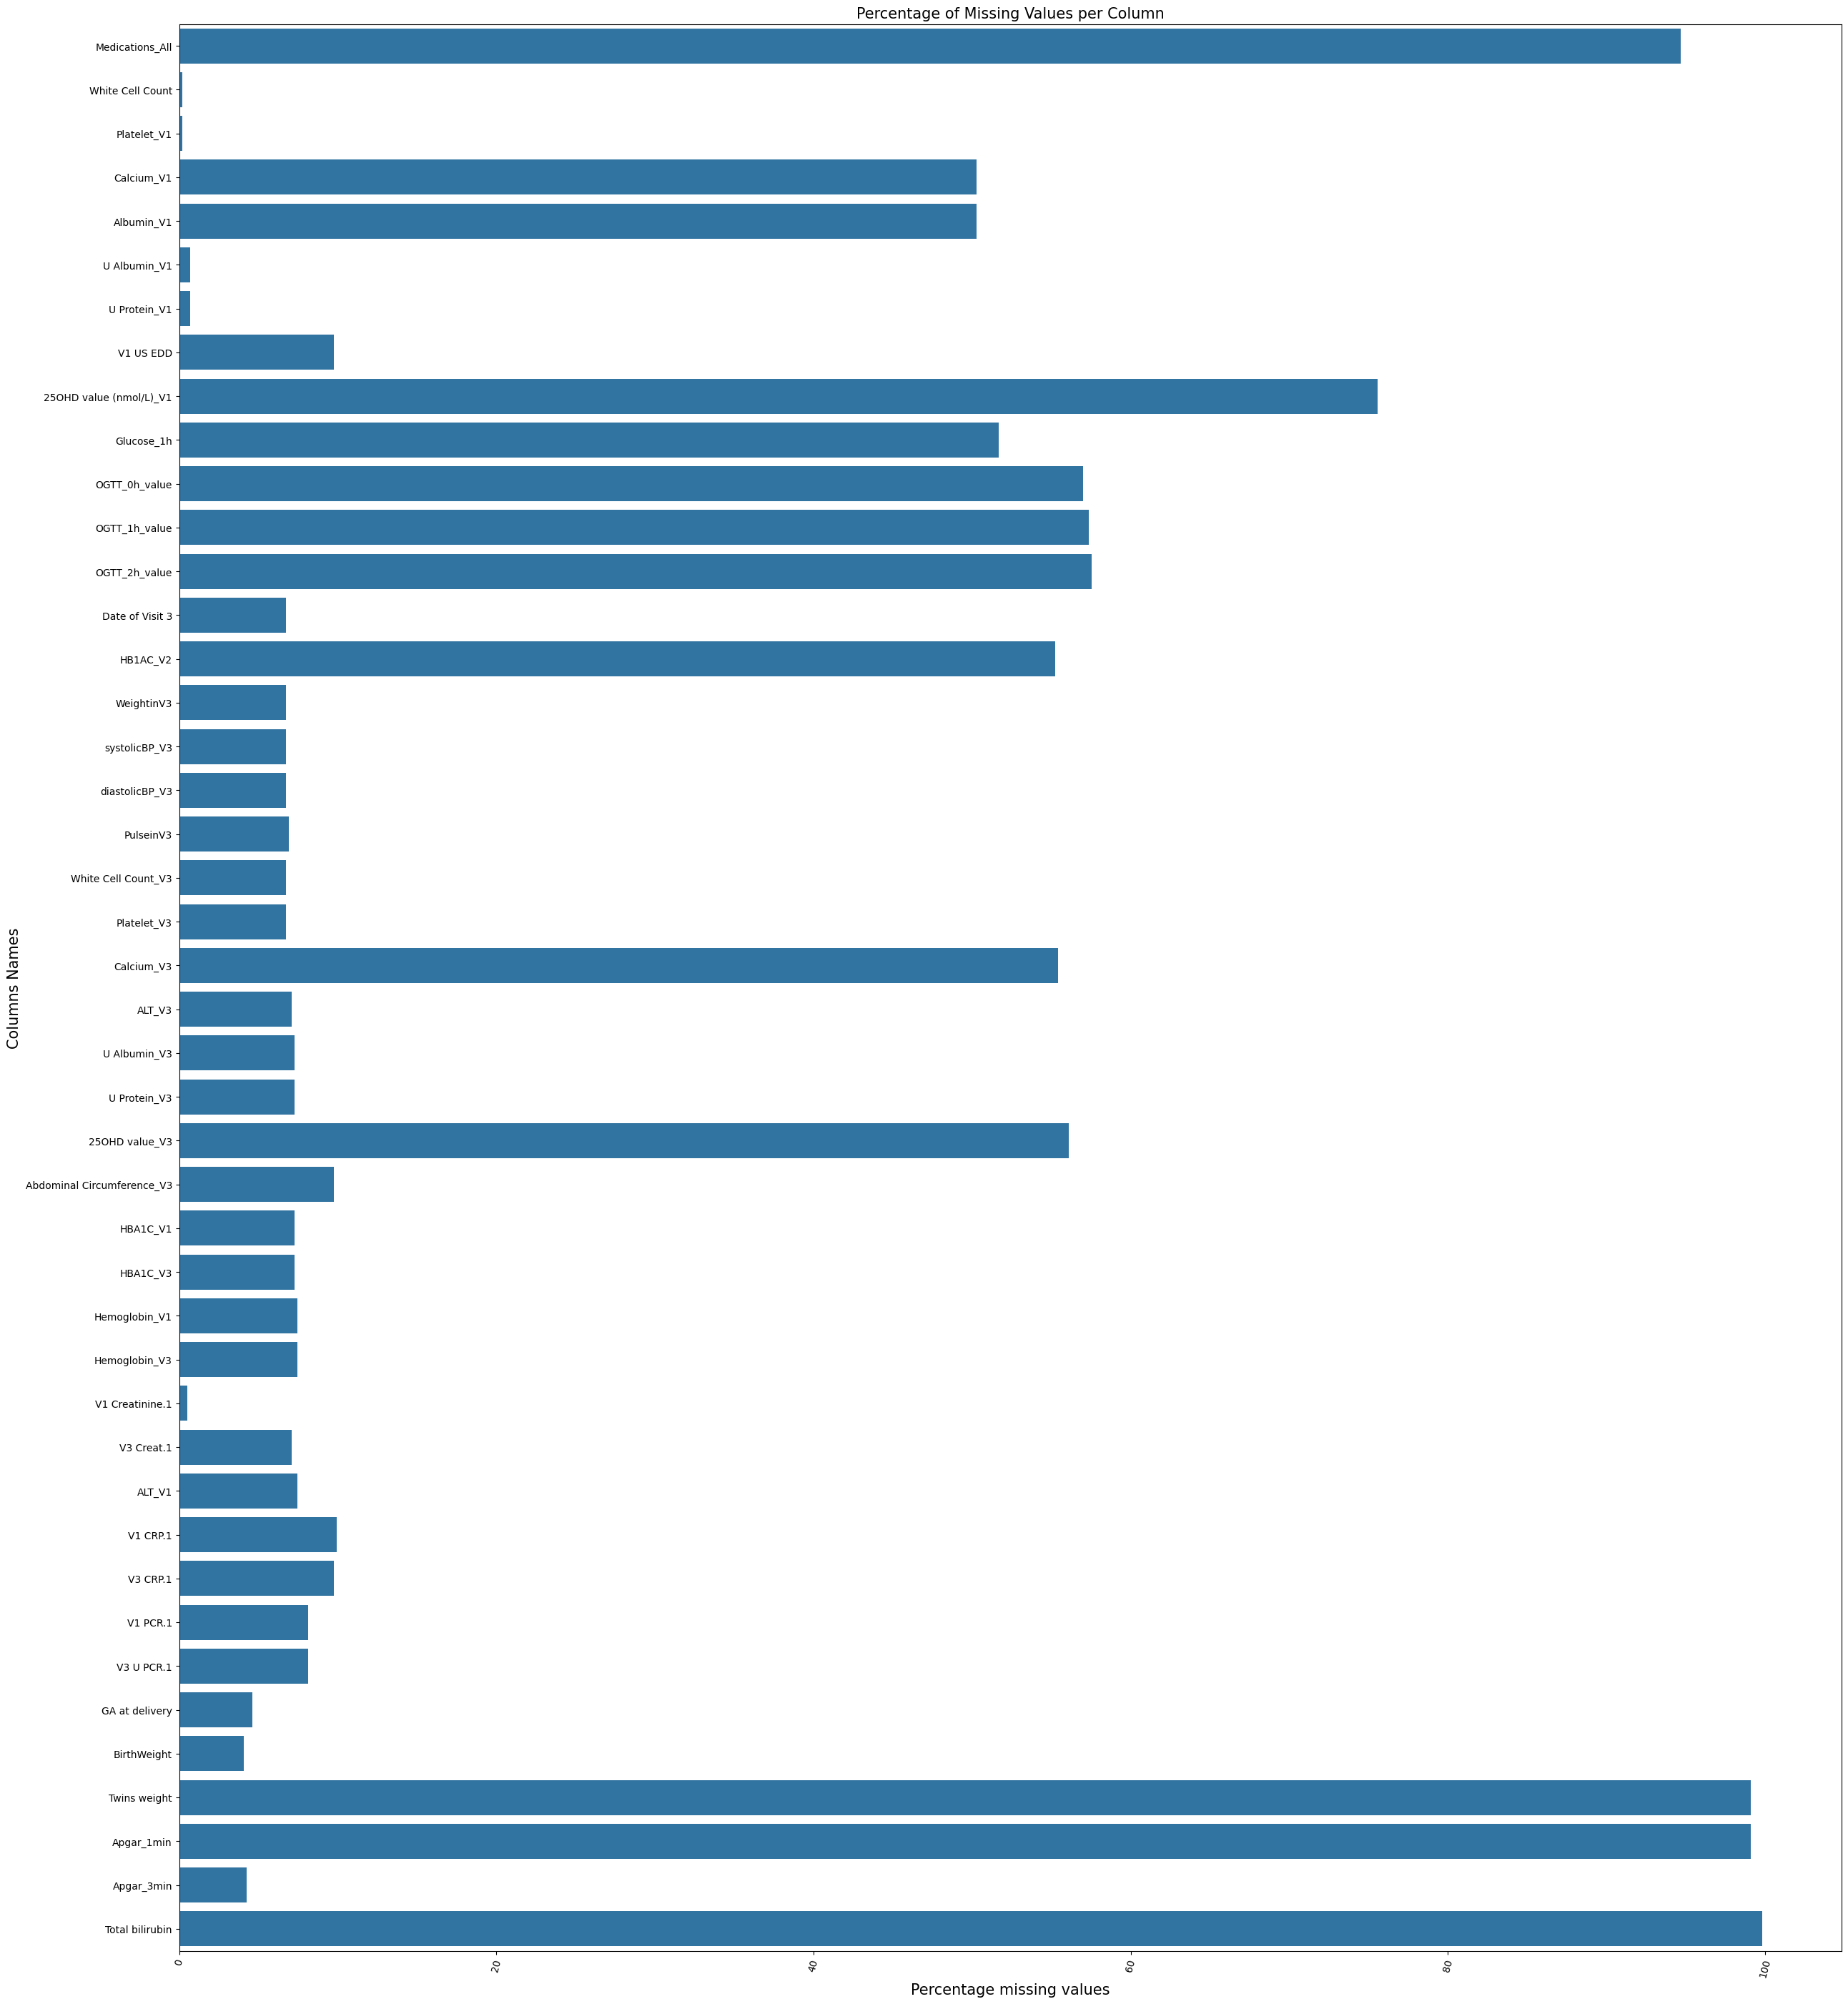

In [164]:
plt.figure(figsize=(30,35))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of Missing Values per Column",fontsize=15)

b=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
b.set_ylabel("Columns Names",fontsize= 15)
b.set_xlabel("Percentage missing values",fontsize= 15)
plt.show()

In [166]:
#Write TO excel

dfGDData.to_excel("GDM_Python_Aug2025.xlsx",sheet_name = "GDM_Data",index=False)

In [168]:
dfGDData.columns

Index(['Patient_ID', 'systolicBP_V1', 'diastolicBP_V1', 'PulseinV1',
       'WeightinV1', 'Height_cms', 'BMIinV1', 'Smoking 123', 'Ethnicity',
       'PreviousGDM10 V1', 'Chronic Illness', 'Medications_All', 'Age_gt_30',
       'HighRisk', 'Screening method', '1st DASS score >33',
       'Gestational Age_V1', 'EDD V1', 'White Cell Count', 'Platelet_V1',
       'Calcium_V1', 'Albumin_V1', 'U Albumin_V1', 'U Protein_V1', 'V1 US EDD',
       'EDDEqLMP', 'EDDMethod', '25OHD value (nmol/L)_V1', 'Caltrate',
       'Glucose_1h', 'OGTT_0h_value', 'OGTT_1h_value', 'OGTT_2h_value',
       'Miscarriage after 28/40 10', 'Withdrew after 28/40 10',
       'Delivered before 36/40', 'Attended Visit 3', 'Date of Visit 3',
       'HB1AC_V2', 'WeightinV3', 'systolicBP_V3', 'diastolicBP_V3',
       'PulseinV3', '3rd visit DASS >33', 'White Cell Count_V3', 'Platelet_V3',
       'Calcium_V3', 'ALT_V3', 'U Albumin_V3', 'U Protein_V3',
       '25OHD value_V3', 'Abdominal Circumference_V3', 'HBA1C_V1', 'HBA1C_